In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

df = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\LOK SABHA.csv")

In [2]:
df.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3,1045839,12476538,48367188,1028145613,184198,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4,1045839,12476538,48367188,1028145613,94420,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5,1045839,12476538,48367188,1028145613,59733,5


# Calculating Distinct Values in a Column for The 2 Years

In [3]:
def counts (col):
    pc_counts = f"""
    select 
        Year,
        count(distinct {col}) as counts
    from 
        df
    group by
        Year
    """
    return sqldf(pc_counts)

# Calculating The Turnout Ratio for a Given Column

In [4]:
def turnoutRatio(col,year,AndStatement):
    query = f"""
    select *
    from
    (
    select 
        *,
        row_number() over(partition by year order by turnoutRatio desc) as rank
    from
        (
        select 
            {col},
            Year,
            (cast(sum(total_votes) as real) / sum(total_electors)) * 100 as turnoutRatio
        from
            df
        group by
            {col},
            year
                    ) as sub
                    ) as sub2
    where Year = {year} {AndStatement}
    """

    return sqldf(query)

## 1. list the top/bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio?

In [5]:
counts('pc_name')

,Year,counts
0,2014,508
1,2019,540


In [6]:
turnoutRatio('pc_name', '2014', 'or Year = 2019').groupby('Year')['turnoutRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2014,508.0,4.803458,2.587482,1.356898,3.267376,4.229622,5.70046,26.034113
2019,540.0,5.274479,2.596554,0.367829,3.425009,4.805321,6.55797,20.329468


In [23]:
turnoutRatio('pc_name', '2014', 'and Year = 2014')['turnoutRatio'].quantile(.95)

8.770947113241245

In [24]:
turnoutRatio('pc_name', '2019', 'and Year = 2019')['turnoutRatio'].quantile(.95)

10.340346461804462

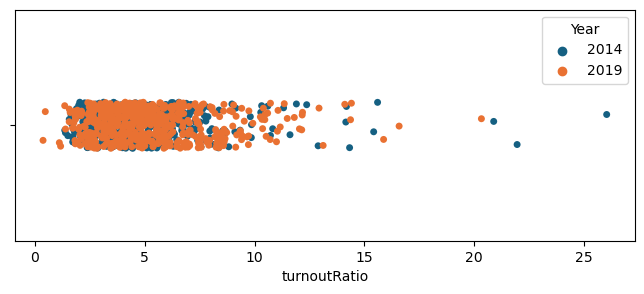

In [25]:
plt.figure(figsize = (8,3))
sns.stripplot( data = turnoutRatio('pc_name', '2014', 'or Year = 2019'),
             x = 'turnoutRatio', hue = 'Year', palette=['#156082', '#E97132'])
plt.show()

In [26]:
# top/ bottom 5 constituencies in 2014
top_bottom_constituencies_2014 = turnoutRatio('pc_name', 2014, 'and (rank <= 5 or rank > 503)')
top_bottom_constituencies_2014

,pc_name,Year,turnoutRatio,rank
0,Tura,2014,26.034113,1
1,Nagaland,2014,21.955507,2
2,Arunachal East,2014,20.889643,3
3,Daman & Diu,2014,15.601420,4
4,Mizoram,2014,15.423651,5
5,Malkajgiri,2014,1.642194,504
6,Chennai North,2014,1.560604,505
7,Amethi,2014,1.496505,506
8,Chennai South,2014,1.387505,507
9,Varanasi,2014,1.356898,508


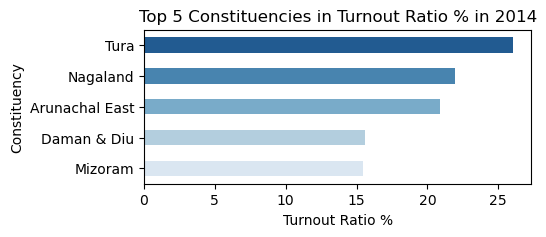

In [27]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_constituencies_2014[0:5], x = 'turnoutRatio', y = 'pc_name',palette = "Blues_r", width = .5)
plt.title('Top 5 Constituencies in Turnout Ratio % in 2014')
plt.ylabel('Constituency')
plt.xlabel('Turnout Ratio %')
plt.show()

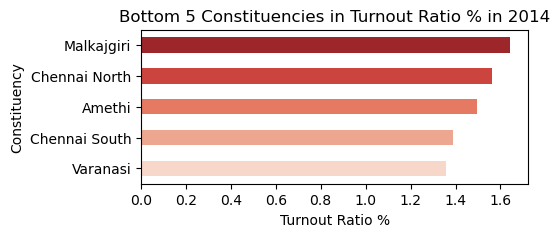

In [28]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_constituencies_2014[5:], x = 'turnoutRatio', y = 'pc_name',palette = "Reds_r", width = .5)
plt.title('Bottom 5 Constituencies in Turnout Ratio % in 2014')
plt.ylabel('Constituency')
plt.xlabel('Turnout Ratio %')
plt.show()

In [29]:
# top/ bottom 5 constituencies in 2019
top_bottom_constituencies_2019 = turnoutRatio('pc_name', 2019, 'and (rank <= 5 or rank > 535)')
top_bottom_constituencies_2019

,pc_name,Year,turnoutRatio,rank
0,Tura,2019,20.329468,1
1,Nagaland,2019,16.582239,2
2,Nabarangpur,2019,15.875384,3
3,Arunachal East,2019,14.410014,4
4,Daman & Diu,2019,14.369805,5
5,Nalanda,2019,1.354583,536
6,Belgaum,2019,1.167832,537
7,Srinagar,2019,1.110065,538
8,Anantnag,2019,0.470280,539
9,Nizamabad,2019,0.367829,540


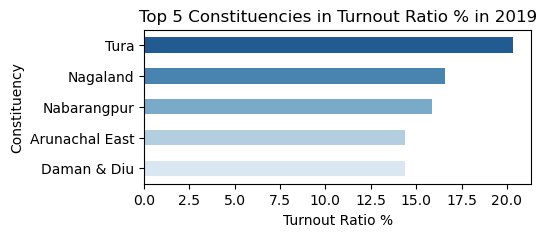

In [30]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_constituencies_2019[0:5], x = 'turnoutRatio', y = 'pc_name',palette = "Blues_r", width = .5)
plt.title('Top 5 Constituencies in Turnout Ratio % in 2019')
plt.ylabel('Constituency')
plt.xlabel('Turnout Ratio %')
plt.show()

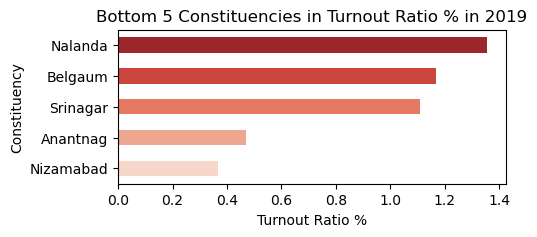

In [31]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_constituencies_2019[5:], x = 'turnoutRatio', y = 'pc_name', palette = "Reds_r", width = .5)
plt.title('Bottom 5 Constituencies in Turnout Ratio % in 2019')
plt.ylabel('Constituency')
plt.xlabel('Turnout Ratio %')
plt.show()

## 2. list the top/bottom 5 states of 2014 and 2019 in terms of voter turnout ratio?

In [6]:
counts('state')

,Year,counts
0,2014,33
1,2019,36


In [83]:
turnoutRatio('state', '2014', 'or Year = 2019').groupby('Year')['turnoutRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2014,33.0,6.593883,4.531707,2.648397,3.44530,4.572961,7.286253,21.955507
2019,36.0,6.209358,3.578911,1.908013,3.63979,5.566864,7.181523,16.582239


In [33]:
turnoutRatio('state', '2014', 'and Year = 2014')['turnoutRatio'].quantile(.95)

15.494758600874182

In [34]:
turnoutRatio('state', '2019', 'and Year = 2019')['turnoutRatio'].quantile(.95)

12.718687461264906

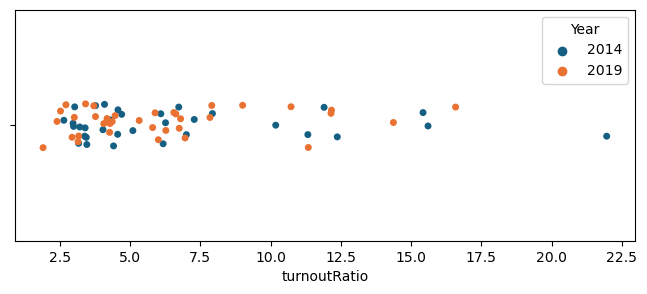

In [35]:
plt.figure(figsize = (8,3))
sns.stripplot( data = turnoutRatio('state', '2014', 'or Year = 2019'),
             x = 'turnoutRatio', hue = 'Year', palette=['#156082', '#E97132'])
plt.show()

In [36]:
# Top/bottom 5 states in 2014
top_bottom_states_2014 = turnoutRatio('state', 2014, 'and (rank <= 5 or rank >28)')
top_bottom_states_2014

,state,Year,turnoutRatio,rank
0,Nagaland,2014,21.955507,1
1,Daman & Diu,2014,15.601420,2
2,Mizoram,2014,15.423651,3
3,Lakshadweep,2014,12.373302,4
4,Sikkim,2014,11.904454,5
5,Jammu & Kashmir,2014,3.172251,29
6,Maharashtra,2014,3.033598,30
7,Haryana,2014,2.993154,31
8,Nct Of Delhi,2014,2.976454,32
9,Puducherry,2014,2.648397,33


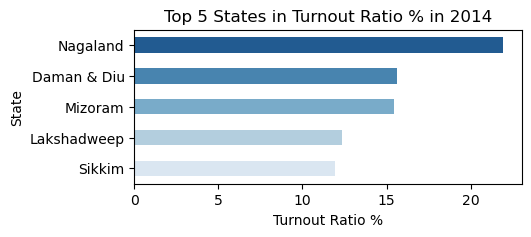

In [37]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_states_2014[0:5], x = 'turnoutRatio', y = 'state', palette = "Blues_r", width = .5 )
plt.title('Top 5 States in Turnout Ratio % in 2014')
plt.ylabel('State')
plt.xlabel('Turnout Ratio %')
plt.show()

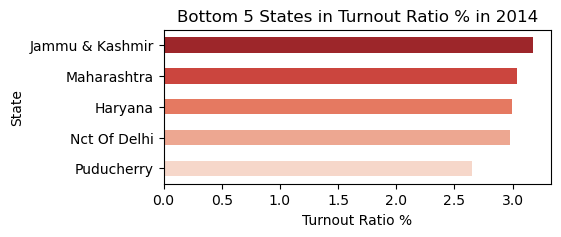

In [38]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_states_2014[5:], x = 'turnoutRatio', y = 'state',palette = "Reds_r", width = .5)
plt.title('Bottom 5 States in Turnout Ratio % in 2014')
plt.ylabel('State')
plt.xlabel('Turnout Ratio %')
plt.show()

In [39]:
# Top/bottom 5 states in 2019
top_bottom_states_2019 = turnoutRatio('state', 2019, 'and (rank <= 5 or rank >31)')
top_bottom_states_2019

,state,Year,turnoutRatio,rank
0,Nagaland,2019,16.582239,1
1,Daman & Diu,2019,14.369805,2
2,Lakshadweep,2019,12.168315,3
3,Meghalaya,2019,12.150354,4
4,Arunachal Pradesh,2019,11.342828,5
5,Punjab,2019,2.941858,32
6,Jammu & Kashmir,2019,2.721060,33
7,Nct Of Delhi,2019,2.529214,34
8,Telangana,2019,2.405000,35
9,Chandigarh,2019,1.908013,36


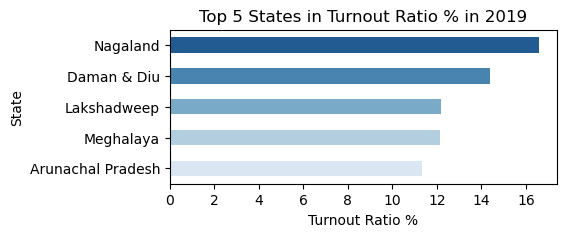

In [40]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_states_2019[0:5], x = 'turnoutRatio', y = 'state', palette = "Blues_r", width = .5)
plt.title('Top 5 States in Turnout Ratio % in 2019')
plt.ylabel('State')
plt.xlabel('Turnout Ratio %')
plt.show()

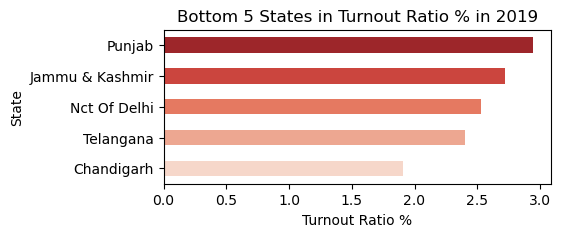

In [41]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_bottom_states_2019[5:], x = 'turnoutRatio', y = 'state', palette = "Reds_r", width = .5)
plt.title('Bottom 5 States in Turnout Ratio % in 2019')
plt.ylabel('State')
plt.xlabel('Turnout Ratio %')
plt.show()